In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [28]:
# Reading datasets
train_dataset = pd.read_csv("Dataset/train.csv")
test_dataset = pd.read_csv("Dataset/train.csv")
test_dataset.head()
# test_dataset.shape

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
test_Dataset = np.array(test_dataset)

test_ds = test_Dataset[0:1000].T # First 1000 subjects of test dataset
Y_test = test_ds[0] # Labels - rows
X_test = test_ds[1:785] # Pixel values - rows, subjects - columns
X_test = X_test / 255.

# print(X_test.shape, Y_test.shape)
print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
data = np.array(train_dataset) # Creating a numpy array from the dataset
m, n = data.shape # m - rows, n - columns
np.random.shuffle(data) # Shuffling the dataset (only the records)

data_dev = data[0:1000].T # First 1000 subjects
Y_dev = data_dev[0] # Labels - rows
X_dev = data_dev[1:n] # Pixel values - rows, subjects - columns
X_dev = X_dev / 255.

data_train = data[1000:m].T # Remaining subjects
Y_train = data_train[0] # Labels - rows
X_train = data_train[1:n] # Pixel values - rows, subjects - columns
X_train = X_train / 255.

print(data.shape, data_dev.shape, data_train.shape, X_dev.shape, Y_dev.shape, X_train.shape, Y_train.shape)

(42000, 785) (785, 1000) (785, 41000) (784, 1000) (1000,) (784, 41000) (41000,)


In [14]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5 
    W3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5 
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3

#     dZ3 = A3 - one_hot_Y
#     dW3 = 1 / m * dZ3.dot(A2.T)
#     db3 = 1 / m * np.sum(dZ3)

#     dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
#     dW2 = 1 / m * dZ2.dot(X.T)
#     db2 = 1 / m * np.sum(dZ2)


def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3  
    b3 = b3 - alpha * db3
    return W1, b1, W2, b2, W3, b3

In [15]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            print("For Iteration: ", i)
            predictions = get_predictions(A3)
            print("Accuracy: ", get_accuracy(predictions, Y))
    return W1, b1, W2, b2, W3, b3

In [16]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.17, 500)

For Iteration:  0
[7 0 0 ... 5 7 5] [2 2 0 ... 7 6 9]
Accuracy:  0.10473170731707317
For Iteration:  10
[8 0 6 ... 5 6 5] [2 2 0 ... 7 6 9]
Accuracy:  0.15370731707317073
For Iteration:  20
[8 3 0 ... 8 6 5] [2 2 0 ... 7 6 9]
Accuracy:  0.22170731707317073
For Iteration:  30
[8 3 0 ... 7 6 2] [2 2 0 ... 7 6 9]
Accuracy:  0.2742926829268293
For Iteration:  40
[8 3 0 ... 7 6 2] [2 2 0 ... 7 6 9]
Accuracy:  0.32746341463414635
For Iteration:  50
[8 3 0 ... 7 6 2] [2 2 0 ... 7 6 9]
Accuracy:  0.39578048780487807
For Iteration:  60
[8 3 0 ... 7 6 2] [2 2 0 ... 7 6 9]
Accuracy:  0.47680487804878047
For Iteration:  70
[9 3 0 ... 7 6 2] [2 2 0 ... 7 6 9]
Accuracy:  0.5449756097560976
For Iteration:  80
[9 3 0 ... 7 6 2] [2 2 0 ... 7 6 9]
Accuracy:  0.592
For Iteration:  90
[9 3 0 ... 7 6 2] [2 2 0 ... 7 6 9]
Accuracy:  0.5432439024390244
For Iteration:  100
[8 3 0 ... 7 6 9] [2 2 0 ... 7 6 9]
Accuracy:  0.6369756097560976
For Iteration:  110
[8 3 0 ... 7 6 9] [2 2 0 ... 7 6 9]
Accuracy:  0.643

In [17]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


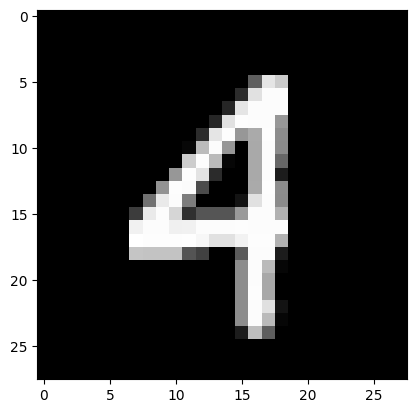

In [18]:
test_prediction(689, W1, b1, W2, b2, W3, b3)

In [19]:
# Predictions on dev dataset
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
get_accuracy(dev_predictions, Y_dev)

[4 2 1 2 1 4 3 8 6 6 4 9 1 7 1 1 2 5 7 7 1 8 7 6 9 1 2 0 2 7 6 5 9 9 2 8 0
 0 2 3 5 2 3 9 3 0 3 7 6 4 9 8 9 3 5 5 5 4 0 2 0 3 1 3 2 3 0 4 5 9 7 1 4 9
 1 3 5 7 0 1 1 7 6 1 2 6 4 6 0 5 4 7 6 7 9 2 0 7 6 7 2 0 4 5 1 0 5 5 0 3 7
 5 6 4 6 7 9 7 2 7 2 8 1 7 6 7 7 7 4 1 7 3 8 2 3 6 7 1 6 6 1 3 8 6 8 0 7 5
 8 9 8 4 5 1 9 0 5 9 2 9 0 4 0 7 6 6 7 0 4 4 8 9 0 0 2 3 9 5 2 3 6 3 1 0 5
 8 7 0 0 9 5 4 4 1 2 1 6 7 3 9 0 2 6 6 0 2 6 1 9 1 6 4 0 8 4 1 7 5 2 6 2 6
 4 0 9 8 0 2 6 2 5 4 5 5 5 3 2 3 3 4 6 1 2 4 6 4 2 2 6 1 3 2 3 0 4 3 7 8 4
 3 1 9 4 2 9 2 5 4 0 3 3 8 6 6 2 9 5 9 1 4 5 1 7 4 2 5 3 8 8 3 5 7 1 0 9 2
 4 2 8 8 2 5 6 3 2 4 9 9 3 7 9 3 9 4 0 4 2 1 1 5 3 6 0 9 0 3 6 0 1 1 3 8 3
 1 3 7 5 1 0 7 0 8 0 7 2 5 3 4 7 6 4 2 5 9 7 6 0 1 0 0 8 9 9 2 8 4 0 3 2 1
 4 9 7 9 0 4 2 8 7 9 1 8 4 0 7 7 0 1 1 4 1 2 4 1 1 5 2 8 2 7 9 7 5 4 2 7 0
 6 6 4 1 5 7 1 4 7 9 0 9 7 9 0 4 5 7 1 9 7 5 4 0 0 1 0 3 5 7 5 0 2 2 7 2 0
 7 4 9 3 0 2 2 9 6 0 7 3 1 2 3 6 9 1 1 4 7 8 7 4 6 3 1 7 7 6 0 2 3 5 1 8 5
 9 8 7 2 4 3 7 6 1 4 1 2 

0.852

In [30]:
# Predictions on the `test` dataset
test_predictions = make_predictions(X_test, W1, b1, W2, b2, W3, b3)
get_accuracy(test_predictions, Y_test)

[1 0 1 2 0 0 7 3 5 3 8 9 1 3 3 1 8 0 7 6 8 6 2 0 2 3 6 9 9 7 8 9 4 9 6 1 3
 1 1 4 3 1 4 9 2 6 5 7 7 4 7 5 1 9 0 2 2 3 9 1 2 1 9 0 6 3 4 5 1 0 3 9 6 2
 6 4 9 1 4 1 5 4 8 9 2 1 9 5 9 4 5 6 4 6 3 7 1 2 0 5 9 2 7 7 2 8 8 5 0 6 0
 0 2 9 0 4 7 7 1 5 7 9 4 4 1 2 7 6 0 0 4 4 2 5 1 1 7 3 7 3 1 0 3 4 5 4 0 5
 4 3 3 5 1 0 8 3 7 0 9 6 6 9 5 4 6 9 3 5 2 2 4 8 7 9 5 8 8 8 2 6 9 3 1 0 4
 1 5 9 0 6 2 8 7 0 6 0 0 5 3 2 0 0 6 0 0 4 7 2 7 1 9 9 3 9 8 4 6 6 1 3 8 1
 8 7 1 3 7 6 3 6 3 4 3 2 3 0 2 7 9 2 2 2 7 3 4 8 9 2 0 1 4 0 6 3 7 1 1 1 4
 7 0 2 7 2 0 5 6 0 5 9 6 2 0 0 7 2 0 4 2 6 9 1 6 9 3 0 0 2 0 6 8 4 0 7 2 1
 9 5 2 4 8 5 2 9 7 7 2 9 7 4 9 3 0 7 3 6 3 6 8 8 5 7 0 9 2 7 9 2 5 4 6 8 4
 3 3 1 7 8 9 7 6 2 1 7 0 5 6 5 2 9 0 4 6 2 2 2 9 0 7 7 2 2 6 3 4 2 0 8 9 6
 2 1 9 0 6 0 4 5 4 3 1 5 4 2 9 5 7 3 1 5 4 5 3 7 3 8 6 9 4 6 1 1 4 0 0 5 8
 6 7 4 2 8 0 2 5 4 8 3 0 4 4 8 6 4 1 8 1 5 4 7 4 3 2 0 6 0 7 9 2 9 8 9 6 3
 2 4 4 6 4 8 4 1 7 5 8 9 5 9 9 7 5 8 2 2 7 2 8 9 1 9 3 6 0 2 2 4 1 2 7 2 1
 3 4 4 1 8 0 2 2 3 4 1 3 

0.87